## Import the requirements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import derl
from derl import EvalRunner, ActorCriticPolicy
from models import ContinuousActorCriticModel
from utils import make_mlp_class, eval_parser, parse_arg_archive
from types import SimpleNamespace

/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/renard/miniconda3/envs/nodeRL/lib

## Instanciate the environment

In [2]:
tf.enable_eager_execution()

logdir = "logdir/ltc/inv_pendulum_8"
eval_steps = 256
render = True



run_args = parse_arg_archive(logdir + '/args.txt')

env = derl.env.make(run_args.env_id)
if hasattr(run_args, 'seed'):
    env.seed(run_args.seed)
policy = make_mlp_class(run_args.policy_net, run_args.recurrent_policy, run_args)(env.action_space.shape[0])
value = make_mlp_class(run_args.value_net, run_args.recurrent_value, run_args)(1)
model = ContinuousActorCriticModel(env.observation_space.shape,
                                    env.action_space.shape[0],
                                    policy, value)
model.load_weights(logdir+'/model') # load the weights from the logged policy
policy_object = ActorCriticPolicy(model)
runner = EvalRunner(env, policy_object, eval_steps, render)

/Users/renard/Documents/etudes/EPFLMA4/LTC/CTNN_Policies_DERL/derl/derl/env/summarize.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.had_ended_episodes = np.zeros(nenvs, dtype=np.bool)
2022-05-01 17:52:25.782739: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


## Run the experiment

In [3]:

trajectory = runner.get_next()

Creating window glfw
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()  File "/Users/renard/miniconda3/envs/nodeRL/lib/python3.7/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()  File "/Users/renard/miniconda3/envs/nodeRL/li

## Plots

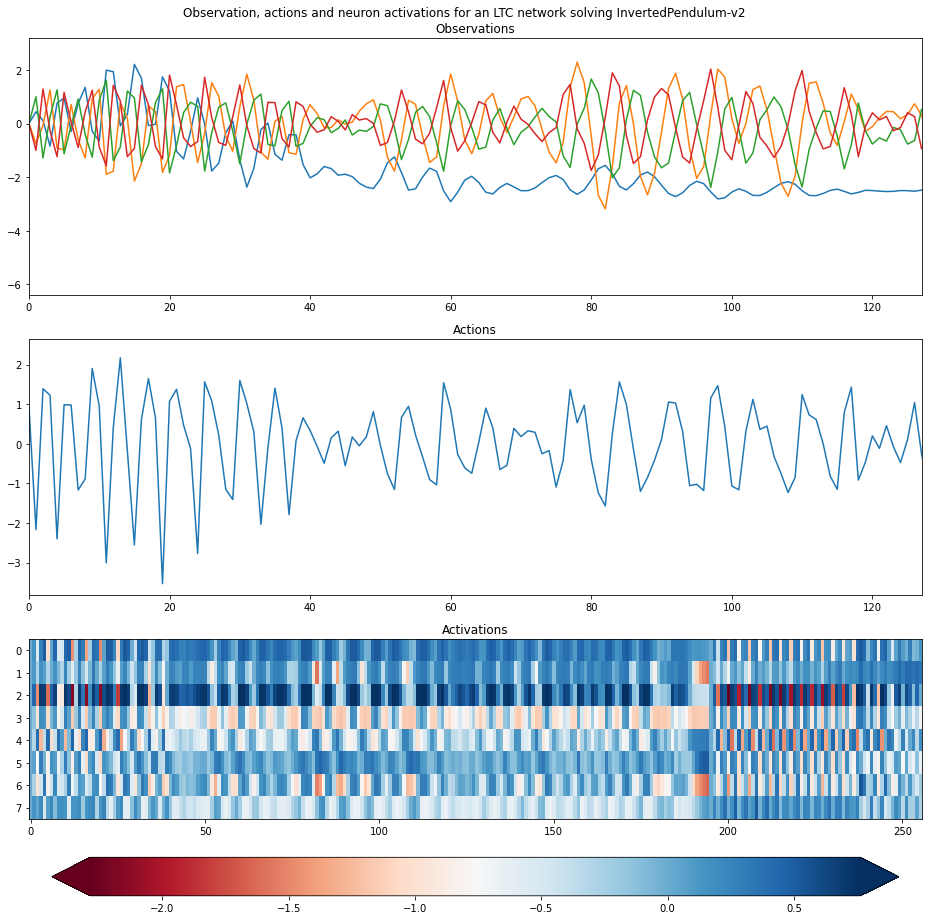

In [4]:
plt.rcParams["figure.figsize"]=13,13

policy_states = trajectory['states'][:,0,0,:]
fig, axs = plt.subplots(3,1)
axs[0].plot(trajectory['observations'])
axs[0].set_xlim([0, 127])
axs[0].set_title("Observations")
axs[1].plot(trajectory['actions'])
axs[1].set_xlim([0, 127])
axs[1].set_title("Actions")
activations = axs[2].imshow(np.transpose(policy_states),aspect="auto", cmap='RdBu',interpolation = 'nearest')
axs[2].set_title("Activations")

fig.suptitle('Observation, actions and neuron activations for an LTC network solving InvertedPendulum-v2')

cbar = fig.colorbar(activations, ax=axs[2],orientation="horizontal", extend='both')

fig.tight_layout()

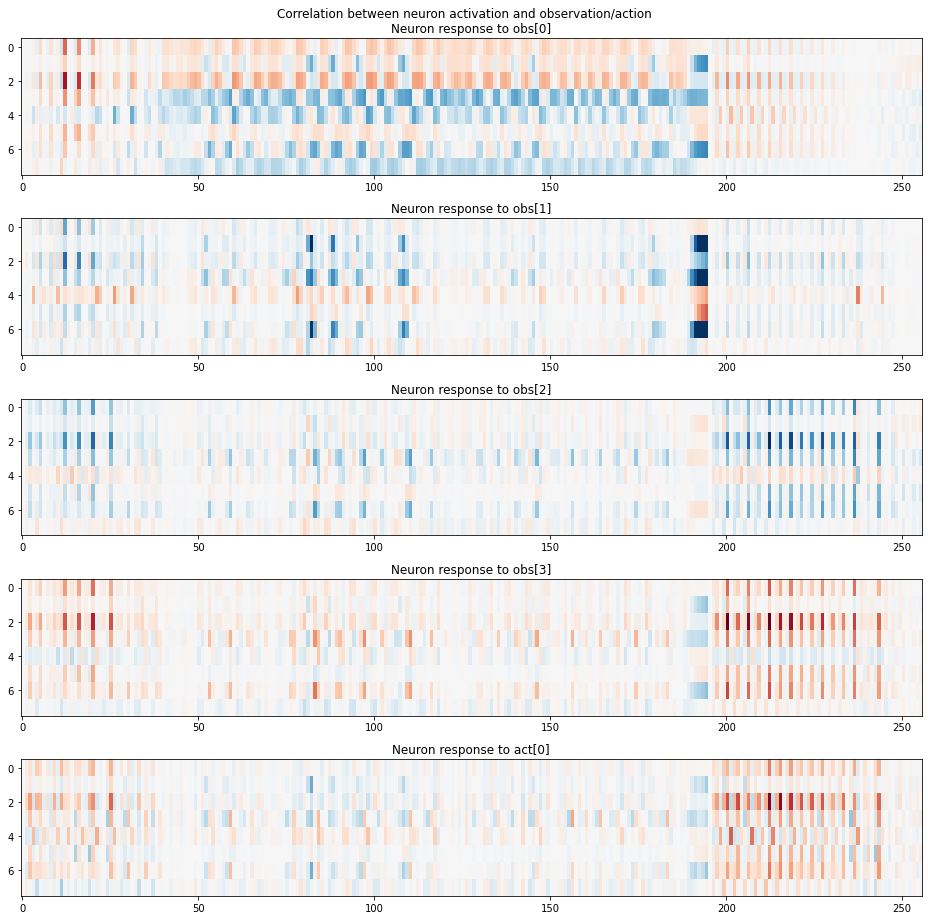

In [5]:
# plt.rcParams["figure.figsize"]=13,13

obs = trajectory['observations']
act = trajectory['actions']
policy_states = trajectory['states'][:,0,0,:]
fig, axs = plt.subplots(5,1)

act_neuron = np.transpose(policy_states)

state_0_corr = act_neuron*obs[:,0]
state_1_corr = act_neuron*obs[:,1]
state_2_corr = act_neuron*obs[:,2]
state_3_corr = act_neuron*obs[:,3]
act_corr = act_neuron*act[:,0]

bounds = 5.

_cmap = 'RdBu'

activations_1 = axs[0].imshow(state_0_corr,aspect="auto", cmap=_cmap,interpolation = 'nearest',vmin=-bounds,vmax=bounds)
axs[0].set_title("Neuron response to obs[0]")
activations_1 = axs[1].imshow(state_1_corr,aspect="auto", cmap=_cmap,interpolation = 'nearest',vmin=-bounds,vmax=bounds)
axs[1].set_title("Neuron response to obs[1]")
activations_1 = axs[2].imshow(state_2_corr,aspect="auto", cmap=_cmap,interpolation = 'nearest',vmin=-bounds,vmax=bounds)
axs[2].set_title("Neuron response to obs[2]")
activations_1 = axs[3].imshow(state_3_corr,aspect="auto", cmap=_cmap,interpolation = 'nearest',vmin=-bounds,vmax=bounds)
axs[3].set_title("Neuron response to obs[3]")
activations_1 = axs[4].imshow(act_corr,aspect="auto", cmap=_cmap,interpolation = 'nearest',vmin=-bounds,vmax=bounds)
axs[4].set_title("Neuron response to act[0]")

fig.suptitle('Correlation between neuron activation and observation/action')

fig.tight_layout()


0.9789113112751168

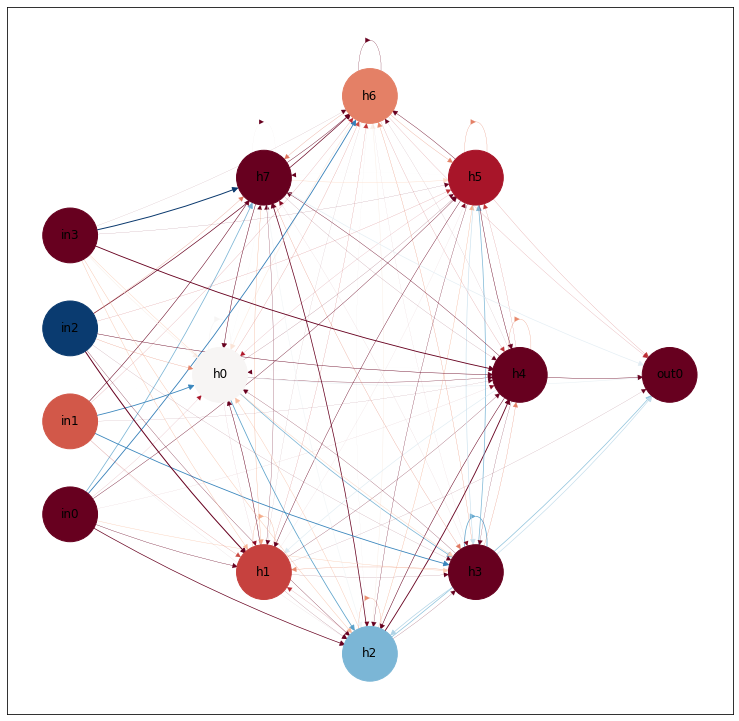

In [62]:
import networkx as nx

_ccode = plt.get_cmap('RdBu')

TIME = 101

obs = trajectory['observations']
act = trajectory['actions']
policy_states = trajectory['states'][:,0,0,:]

def network_to_nx(inputs,hidden,outputs):
    G = nx.DiGraph(directed=True)

    in_weights = policy_object.model.policy.weights[0].numpy()
    ltc_weights = policy_object.model.policy.weights[2].numpy()
    out_weights = policy_object.model.policy.weights[4].numpy()
        
    for i in range(hidden):
        n = 'h{}'.format(i)
        G.add_node(n, weight=policy_states[TIME,i])
    for i in range(hidden):
        for j in range(hidden):
            G.add_edge('h{}'.format(i),'h{}'.format(j), weight = ltc_weights[i,j])  
    
    pos = nx.shell_layout(G)
    
    for i in range(inputs):
        n = 'in{}'.format(i)
        G.add_node(n, weight=obs[TIME,i])
        pos[n] = np.array([-2,  i/((inputs+2)/2) - 0.5 ])
    for i in range(outputs):
        n = 'out{}'.format(i)
        G.add_node(n, weight=act[TIME,i])
        pos[n] = np.array([2,  i/(outputs/2) ])
    
    for i in range(inputs):
        for j in range(hidden):
            G.add_edge('in{}'.format(i),'h{}'.format(j), weight = in_weights[i,j])  
    
    for i in range(hidden):
        for j in range(outputs):
            G.add_edge('h{}'.format(i),'out{}'.format(j), weight = out_weights[i,j])  
            
    return G, pos

G, pos = network_to_nx(4,8,1)
weights = nx.get_edge_attributes(G,'weight').values()
edge_colors = [_ccode(e) for e in nx.get_edge_attributes(G,'weight').values()]
node_colors = [_ccode(e) for e in nx.get_node_attributes(G,'weight').values()]
    
options = {
    'node_color': list(node_colors),
    'node_size': 3000,
    'width': list(weights),
    'edge_color': edge_colors,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}    

nx.draw_networkx(G,pos, arrows=True, **options,connectionstyle='arc3, rad = 0.05')

In [96]:
import matplotlib.pyplot as plt
from graphviz import Digraph
import networkx as nx
import numpy as np
import tensorflow as tf
import derl
from derl import EvalRunner, ActorCriticPolicy
from models import ContinuousActorCriticModel
from utils import make_mlp_class, eval_parser, parse_arg_archive
from types import SimpleNamespace

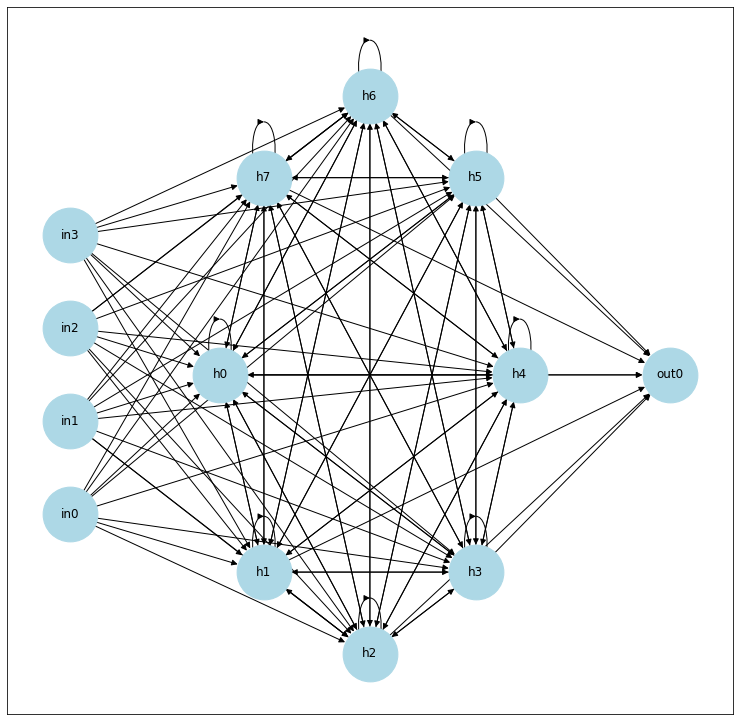

In [144]:
import networkx as nx
import matplotlib.pyplot as plt


def network_to_nx(inputs,hidden,outputs):
    G = nx.DiGraph(directed=True)

    for i in range(hidden):
        n = 'h{}'.format(i)
        G.add_node(n)
    for i in range(hidden):
        for j in range(hidden):
            G.add_edge('h{}'.format(i),'h{}'.format(j))  
    
    pos = nx.shell_layout(G)
    
    for i in range(inputs):
        n = 'in{}'.format(i)
        G.add_node(n)
        pos[n] = np.array([-2,  i/((inputs+2)/2) - 0.5 ])
    for i in range(outputs):
        n = 'out{}'.format(i)
        G.add_node(n)
        pos[n] = np.array([2,  i/(outputs/2) ])
    
    for i in range(inputs):
        for j in range(hidden):
            G.add_edge('in{}'.format(i),'h{}'.format(j))  
    
    for i in range(hidden):
        for j in range(outputs):
            G.add_edge('h{}'.format(i),'out{}'.format(j))  
            
    return G, pos
    
options = {
    'node_color': 'lightblue',
    'node_size': 3000,
    'width': 1,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}    

G, pos = network_to_nx(4,8,1)
nx.draw_networkx(G,pos, arrows=True, **options)

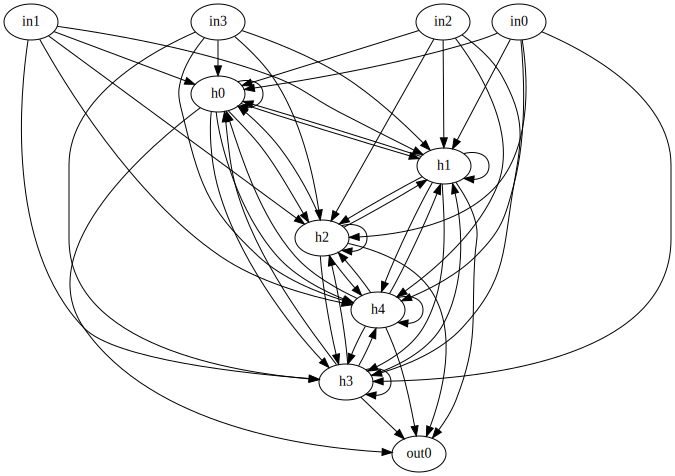

In [94]:
def plot_network(inputs,hidden,outputs):
    graph = Digraph()
    for i in range(inputs):
        n = 'in{}'.format(i)
        graph.node(n, n)  
    for i in range(hidden):
        n = 'h{}'.format(i)
        graph.node(n, n)    
    for i in range(outputs):
        n = 'h{}'.format(i)
        graph.node(n, n)    

    
    for i in range(inputs):
        for j in range(hidden):
            graph.edge('in{}'.format(i),'h{}'.format(j))  
    

    for i in range(hidden):
        for j in range(hidden):
            graph.edge('h{}'.format(i),'h{}'.format(j))  
            
    for i in range(hidden):
        for j in range(outputs):
            graph.edge('h{}'.format(i),'out{}'.format(j))  
            
    
            
    return graph
    
plot_network(4,5,1)